Нечётный вариант

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/5 сем/сии/4/Student_Performance.csv')

In [ ]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).

In [ ]:
print("Количество строк:")
print(len(df))
print()

print("Среднее значение:")
print(df.mean(numeric_only=True))
print()

print("Стандартное отклонение по столбцам:")
print(df.std(numeric_only=True))
print()

print("Максимум:")
print(df.max(numeric_only=True))
print()

print("Минимум:")
print(df.min(numeric_only=True))
print()


Количество строк:
10000

Среднее значение:
Hours Studied                        4.9929
Previous Scores                     69.4457
Sleep Hours                          6.5306
Sample Question Papers Practiced     4.5833
Performance Index                   55.2248
dtype: float64

Стандартное отклонение по столбцам:
Hours Studied                        2.589309
Previous Scores                     17.343152
Sleep Hours                          1.695863
Sample Question Papers Practiced     2.867348
Performance Index                   19.212558
dtype: float64

Максимум:
Hours Studied                         9.0
Previous Scores                      99.0
Sleep Hours                           9.0
Sample Question Papers Practiced      9.0
Performance Index                   100.0
dtype: float64

Минимум:
Hours Studied                        1.0
Previous Scores                     40.0
Sleep Hours                          4.0
Sample Question Papers Practiced     0.0
Performance Index             


Квантили - это значения в наборе данных, которые делят его на определенные доли. Квантиль представляет собой значение, ниже которого падает определенная доля данных.

1. Медиана (50-й процентиль, второй квартиль): Это значение, которое делит данные на две равные части. Половина данных находится выше медианы, а другая половина — ниже.

In [ ]:
print(df.median(numeric_only=True))

Hours Studied                        5.0
Previous Scores                     69.0
Sleep Hours                          7.0
Sample Question Papers Practiced     5.0
Performance Index                   55.0
dtype: float64


2. Первый квартиль (25-й процентиль): Значение, ниже которого находится 25% данных. Также известен как Q1.

In [ ]:
print(df.quantile(q=0.25, numeric_only=True))


Hours Studied                        3.0
Previous Scores                     54.0
Sleep Hours                          5.0
Sample Question Papers Practiced     2.0
Performance Index                   40.0
Name: 0.25, dtype: float64


3. Третий квартиль (75-й процентиль): Значение, ниже которого находится 75% данных. Также известен как Q3.

In [ ]:
print(df.quantile(q=0.75, numeric_only=True))

Hours Studied                        7.0
Previous Scores                     85.0
Sleep Hours                          8.0
Sample Question Papers Practiced     7.0
Performance Index                   71.0
Name: 0.75, dtype: float64


Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка.

In [ ]:
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [Hours Studied, Previous Scores, Extracurricular Activities, Sleep Hours, Sample Question Papers Practiced, Performance Index]
Index: []


Отсутствующих значений в датасете нет.

In [ ]:
print(df.dtypes)

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object


Данные в столбцах одного типа

In [ ]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})

In [ ]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


MinMaxScaler приводит значения к интервалу [0, 1].
Формула: X_scaled = (X- Xmin)/(Xmax - Xmin)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Создание экземпляра класса MinMaxScaler
scaler = MinMaxScaler()

# Нормировка данных
df_n = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
df_n

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.750,1.000000,1.0,1.0,0.111111,0.900000
1,0.375,0.711864,0.0,0.0,0.222222,0.611111
2,0.875,0.186441,1.0,0.6,0.222222,0.388889
3,0.500,0.203390,1.0,0.2,0.222222,0.288889
4,0.750,0.593220,0.0,0.8,0.555556,0.622222
...,...,...,...,...,...,...
9995,0.000,0.152542,1.0,0.0,0.222222,0.144444
9996,0.750,0.406780,1.0,0.8,0.555556,0.533333
9997,0.625,0.728814,1.0,0.8,0.555556,0.711111
9998,1.000,0.966102,1.0,0.6,0.000000,0.944444


Разделите данные на обучающий и тестовый наборы данных.

In [ ]:
from sklearn.model_selection import train_test_split

X = df_n.drop('Performance Index', axis=1)
y = df_n['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

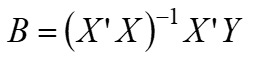

In [ ]:
def linear_regression(X, Y):
    n = len(X)
    X_with_b = np.c_[np.ones(n), X]

    inverse_XTX = np.linalg.inv(X_with_b.T @ X_with_b)

    beta = inverse_XTX @ X_with_b.T @ Y

    return beta

In [ ]:
coefficients = linear_regression(X_train, y_train)

In [ ]:
coefficients

array([0.0168648 , 0.25355413, 0.66669226, 0.00676241, 0.02649675,
       0.01918314])

In [ ]:
y_pred = np.c_[np.ones(len(X_test)), X_test] @ coefficients

In [ ]:
mean_squared_error(y_test, y_pred)

0.0005040281973483782

In [ ]:
pd.DataFrame(y_pred)

,0
0,0.496798
1,0.140172
2,0.421146
3,0.236553
4,0.366717
...,...
1995,0.409848
1996,0.585534
1997,0.075482
1998,0.592703


In [ ]:
pd.DataFrame(y_test)

,Performance Index
6252,0.455556
4684,0.111111
1731,0.400000
4742,0.200000
4521,0.344444
...,...
6412,0.388889
8285,0.622222
7853,0.066667
1095,0.611111


from matplotlib import pyplot as plt
_df_24['Performance Index'].plot(kind='hist', bins=20, title='Performance Index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['Performance Index'].plot(kind='line', figsize=(8, 4), title='Performance Index')
plt.gca().spines[['top', 'right']].set_visible(False)

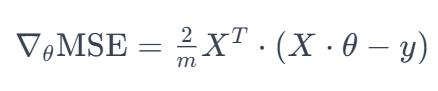

In [ ]:
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = len(X)
    theta = linear_regression(X, y)

    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T @ (X_b @ theta - y)
        theta = theta - learning_rate * gradients

    return theta


X_train

theta_best = gradient_descent(X_train, y_train)

print('Оптимальные коэффициенты:', theta_best)

Оптимальные коэффициенты: [0.0168648  0.25355413 0.66669226 0.00676241 0.02649675 0.01918314]


In [ ]:
y_pred = np.c_[np.ones(len(X_test)), X_test] @ theta_best

In [ ]:
mean_squared_error(y_test, y_pred)

0.000504028197348378

In [ ]:
X_train

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
9254,0.500,0.152542,0.0,0.6,0.555556
1561,0.125,0.135593,1.0,0.6,0.666667
1670,0.125,0.694915,0.0,0.6,0.222222
6087,0.125,0.101695,0.0,0.4,0.111111
6669,0.875,0.118644,0.0,1.0,0.000000
...,...,...,...,...,...
5734,0.875,0.169492,1.0,0.4,0.666667
5191,0.375,0.474576,0.0,1.0,0.333333
5390,1.000,0.135593,0.0,0.6,0.666667
860,0.000,0.118644,0.0,1.0,0.000000


In [ ]:
class Model1:
    def __init__(self):
        self.weights = None
    def fit(self, X, y):
        self.weights = gradient_descent(X, y)
        return self

    def predict(self, X):
        X = np.c_[np.ones(len(X)), X]
        return X @ self.weights

In [ ]:
class Model2:
    def __init__(self):
        self.weights = None
    def fit(self, X, y):
        X = X.drop('Previous Scores', axis=1)
        self.weights = gradient_descent(X, y)
        return self

    def predict(self, X):
        X = X.drop('Previous Scores', axis=1)
        X = np.c_[np.ones(len(X)), X]
        return X @ self.weights

In [ ]:
class Model3:
    def __init__(self):
        self.weights = None
    def fit(self, X, y):
        X = X[['Previous Scores', 'Hours Studied']]
        self.weights = gradient_descent(X, y)
        return self

    def predict(self, X):
        X = X[['Previous Scores', 'Hours Studied']]
        X = np.c_[np.ones(len(X)), X]
        return X @ self.weights

In [ ]:
class Model4:
    def __init__(self):
        self.weights = None
    def fit(self, X, y):
        X = X[['Previous Scores', 'Hours Studied', 'Sample Question Papers Practiced', 'Sleep Hours']]
        self.weights = gradient_descent(X, y)
        return self

    def predict(self, X):
        X = X[['Previous Scores', 'Hours Studied', 'Sample Question Papers Practiced', 'Sleep Hours']]
        X = np.c_[np.ones(len(X)), X]
        return X @ self.weights

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
model1 = Model1().fit(X_train, y_train)
print(model1.weights)
y_pred = model1.predict(X_test)
r2_score(y_test, y_pred)

[0.0168648  0.25355413 0.66669226 0.00676241 0.02649675 0.01918314]


0.9889832909573145

In [ ]:
model2 = Model2().fit(X_train, y_train)
print(model2.weights)
y_pred = model2.predict(X_test)
r2_score(y_test, y_pred)

[0.34995006 0.24689373 0.00782409 0.02643061 0.02588153]


0.13788314060584927

In [ ]:
model3 = Model3().fit(X_train, y_train)
y_pred = model3.predict(X_test)
r2_score(y_test, y_pred)

0.985855014245765

In [ ]:
model4 = Model4().fit(X_train, y_train)
y_pred = model4.predict(X_test)
r2_score(y_test, y_pred)

0.9887144552384186

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()

rfe = RFE(estimator=model, n_features_to_select=1)  # 1 - количество оставляемых признаков

fit = rfe.fit(X_train, y_train)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))


Num Features: 1
Selected Features: [False  True False False False]
Feature Ranking: [2 1 5 3 4]


In [ ]:
X_train

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
9254,0.500,0.152542,0.0,0.6,0.555556
1561,0.125,0.135593,1.0,0.6,0.666667
1670,0.125,0.694915,0.0,0.6,0.222222
6087,0.125,0.101695,0.0,0.4,0.111111
6669,0.875,0.118644,0.0,1.0,0.000000
...,...,...,...,...,...
5734,0.875,0.169492,1.0,0.4,0.666667
5191,0.375,0.474576,0.0,1.0,0.333333
5390,1.000,0.135593,0.0,0.6,0.666667
860,0.000,0.118644,0.0,1.0,0.000000


Рейтинг признаков:
1. Previous Scores
2. Hours Studied
3. Sleep Hours
4. Sample Question Papers Practiced
5. Extracurricular Activities

Добавление синтетического признака:

In [ ]:
X_train['Study and Sleep Hours'] = X_train['Hours Studied'] + X_train['Sleep Hours']
X_test['Study and Sleep Hours'] = X_test['Hours Studied'] + X_test['Sleep Hours']

In [ ]:
model = Model1().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

0.9756383199966243